Introduction to Complex Systems problem sheet 1
Representing data as a network, 2019/2020
A very good book for this chapter is the book Social Network Analysis for Startups by Maksim Tsvetovat and Alexander Kouznetsov, first published in 2011. You can learn from this book how to analyze
social media data and were these kind of data can be found. You can also learn more about NetworkX
environment (Python), which will be very useful tool during this course.
1. Visit the following sites and check what kind of data can you acquire and what kind of visualization
can you make:
• http://networkrepository.com/
• http://snap.stanford.edu
• http://www−personal.umich.edu/mejn/netdata/
Download a chosen dataset and draw a network.
2. Networks are often used to represent collaboration between researchers. Using Scopus database
(https : //www.scopus.com) create a database for researchers working in the Department of Computer Science WPPT, PWR and in the Department of Theoretical Physics WPPT, PWR , something similar that can be found at
http : //www.kft.pwr.edu.pl/?Publications (short database for KFT). In fact you can start with
this short database for KFT for simplicity. Create a network: node = researcher, link between two
researchers if they have a common paper. Plot the network.
3. We will analyze the book by Lewis Carroll Alice’s Adventures in Wonderland.
Visit https : //www.gutenberg.org/browse/scores/top and download a book in an appropriate
format. Among others pdf and txt versions are available. Conduct two types of analysis:
(a) Classical Zipf analysis, checking the frequency distribution of words. This method was presented during the Introduction to Complex Systems: (1) compute the frequency of each word in
the book, (2) sort them by frequency and give ranks – the most frequent word should have
rank 1, etc. (3) plot the dependence between frequency and rank in 2 scales: linear and log-log
scale, (4) find an exponent that describes a power-law for this book.
(b) Present a text as a network. Words will be nodes and relations between them will be represented
by links. There are several possibilities to do this. Here we use the simple idea of undirected,
unweighted network: two words will be linked if the appear next to each other (word-adjacency
technique). Do you have any other idea? Plot this network and the distribution of the degree
of nodes. List 10 nodes (words) with the highest degree and 10 with the lowest.

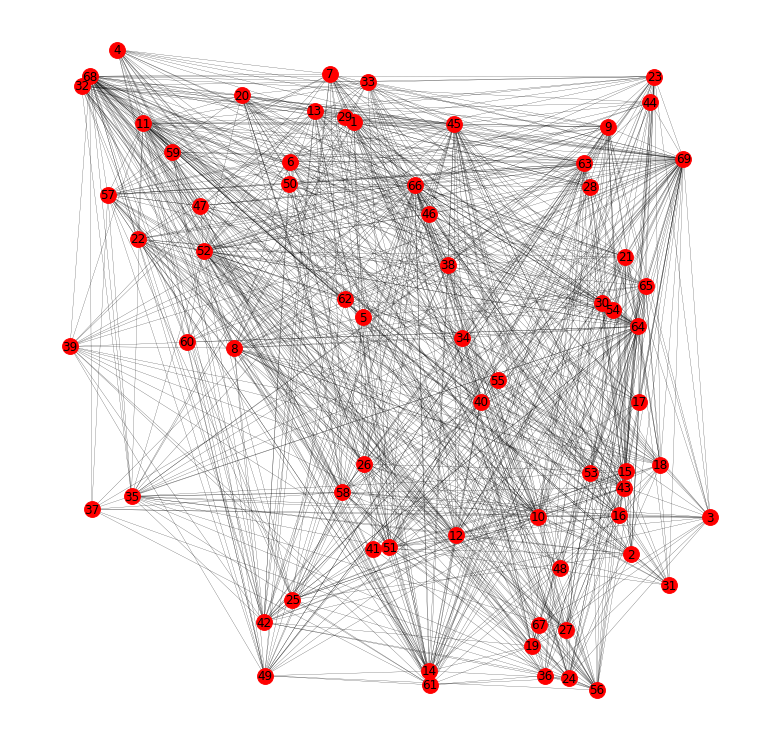

In [134]:
# Task 1

# @inproceedings{nr-aaai15,
#       title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
#       author={Ryan A. Rossi and Nesreen K. Ahmed},
#       booktitle = {Proceedings of the Twenty-Ninth AAAI Conference on Artificial Intelligence},
#       url={http://networkrepository.com},
#       year={2015}
#   }

from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt

def openFile():
    with open('eco-everglades.edges', 'r') as file:
        data = file.read()
    edges = [record.split() for record in data.split("\n") if len(record)]
    edges_formated = [(int(edge[0]), int(edge[1]), float(edge[2])) for edge in edges]
#     pprint(edges_formated)
    return edges_formated
        
edges = openFile()
G = nx.Graph()
G.add_weighted_edges_from(edges)
plt.figure(1,figsize=(10,10))
options = {
    'with_labels': True,
    'node_color': 'red',
    'node_size': 250,
    'width': 0.2,
}
nx.draw_random(G, **options)
plt.show()

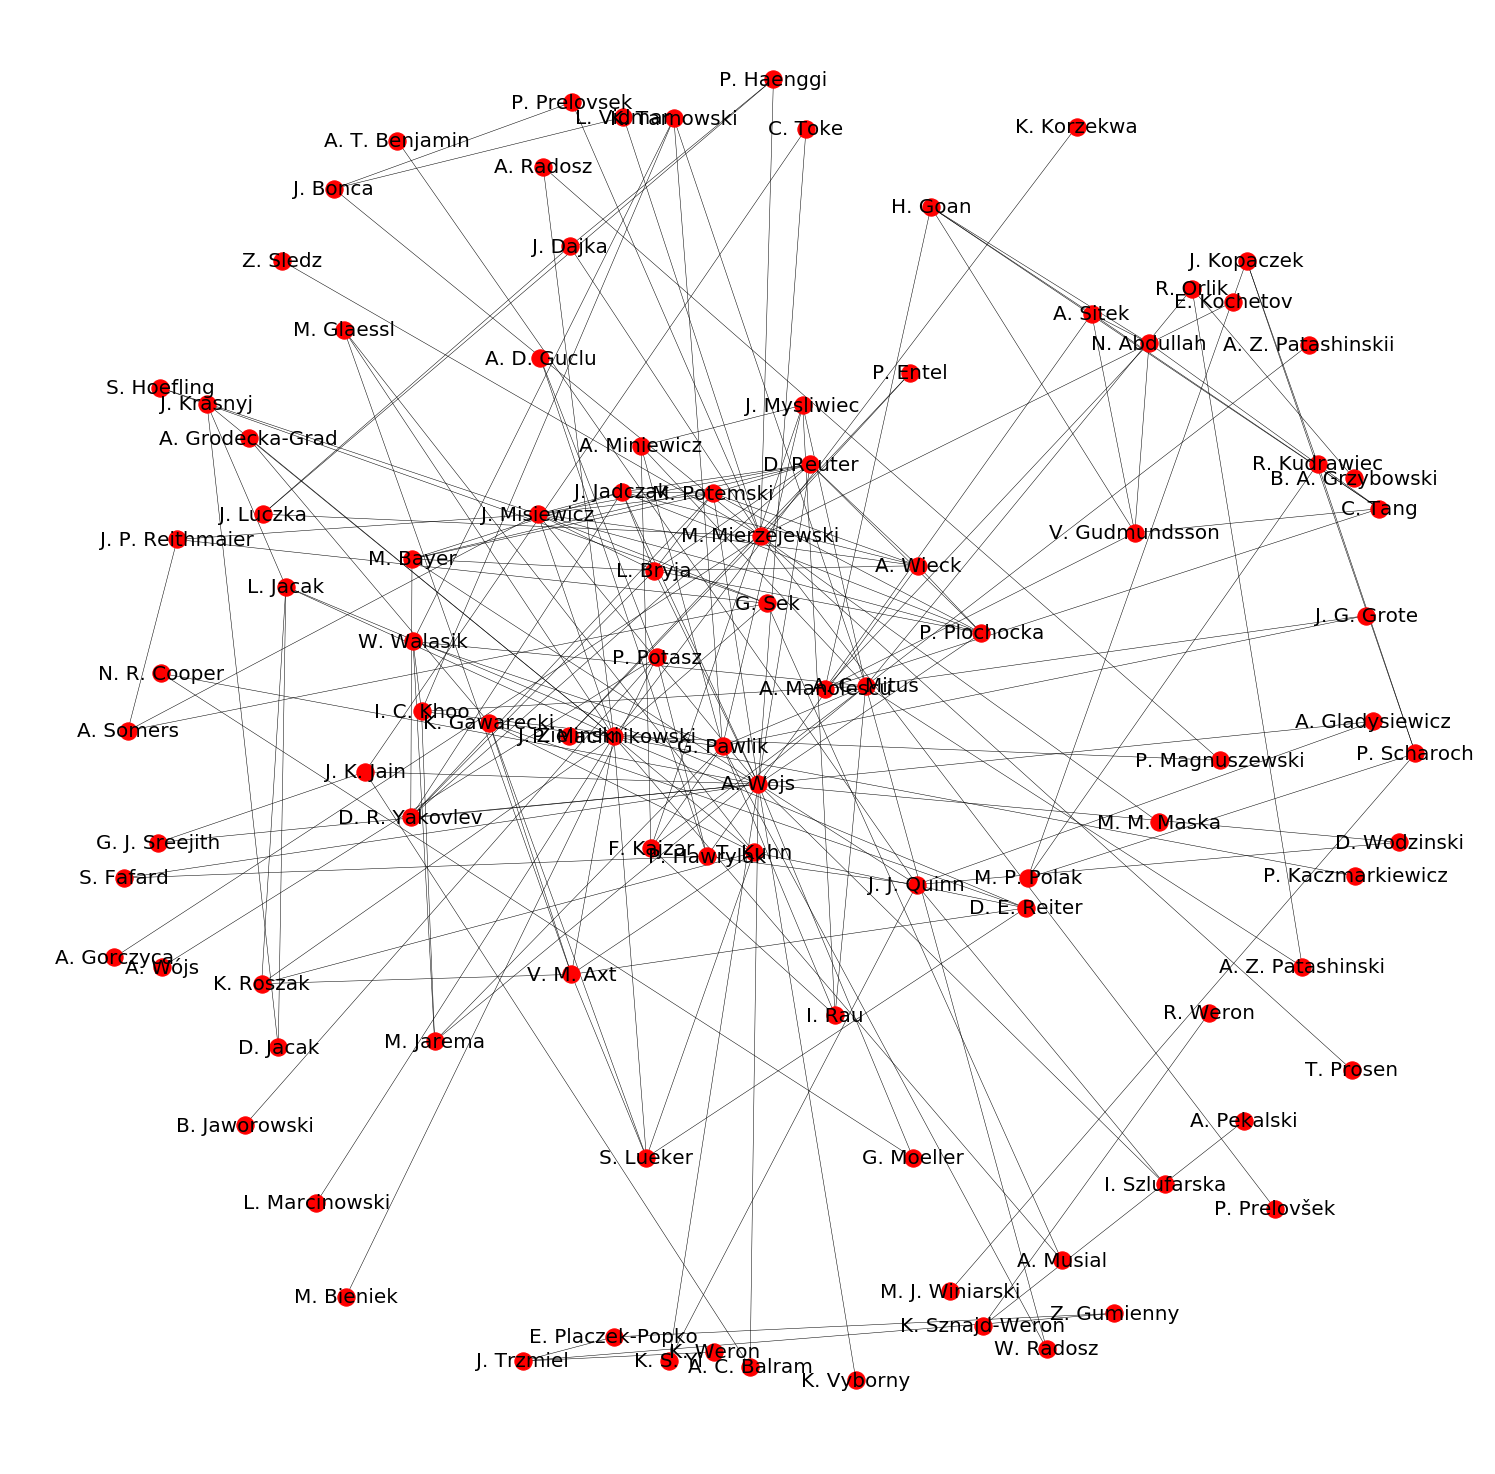

In [145]:
# Task 2

# KFT
import re
from pprint import pprint
from itertools import combinations
from collections import Counter

FIND_AUTHORS = re.compile('<li>([\w\s.,-]*)<em>')

def openFileaa():
    with open('aa.html', 'r', encoding='utf-8') as file:
        data = file.read()
    return data

data = openFileaa()
authors_same_book = FIND_AUTHORS.findall(data)
authors_list = []
for co_author in authors_same_book:
    for author in co_author.split(','):
        if len(author)>2:
            authors_list.append(author.strip())
authors_map = {author: index for index, author in enumerate(set(authors_list))}
# pprint(authors_map)
edges = []
nr_of_edges = 0
for co_author in authors_same_book:
    for pair in combinations(co_author.split(',')[0:-1], 2):
        author_a = pair[0].strip()
        author_b = pair[1].strip()
        nr_of_edges+=1
        if author_a > author_b:
            edges.append((author_a, author_b)) 
        else:
            edges.append((author_b, author_a))
edges_with_weight = []
for pair, weight in Counter(edges).items():
    if weight > 4:
        edges_with_weight.append((pair[0], pair[1], weight/nr_of_edges))

G = nx.Graph()
G.add_weighted_edges_from(edges_with_weight)
plt.figure(1,figsize=(20, 20))
options = {
    'with_labels': True,
    'node_color': 'red',
    'node_size': 300,
    'width': 0.5,
    'font_size': 20, 
}
nx.draw(G, **options)



[1, 2]
